# Undersampling and Oversampling

## 1.0 - Imports

In [145]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve

## 2.0 - Extraction

In [2]:
df = pd.read_csv('../dataset/credit_data.csv')

## 3.0 - Spliting data

In [43]:
sss = StratifiedShuffleSplit(test_size=0.1)
for x, y in sss.split(df, df['c#default']):
    df_train = df.iloc[x]
    df_test = df.iloc[y]
df_train.shape, df_test.shape

((1800, 5), (200, 5))

## 4.0 - Cleaning data

### 4.1 - Visualizing

In [44]:
df_train.isna().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

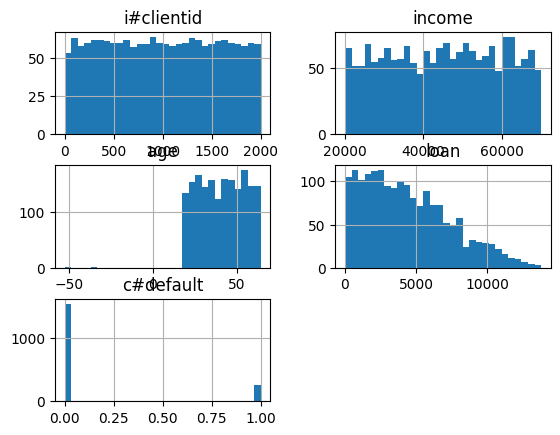

In [ ]:
df_train.hist(bins=30);

<AxesSubplot: >

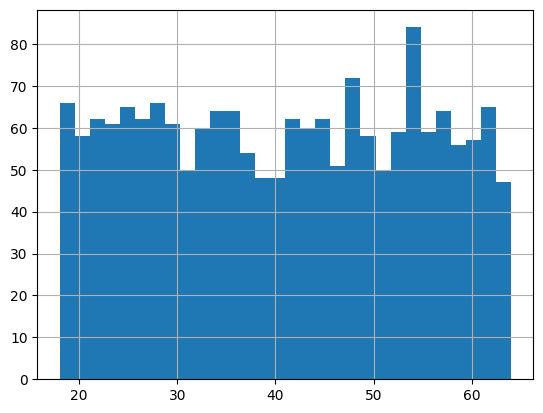

In [53]:
df_train['age'].hist(bins=30)

<AxesSubplot: >

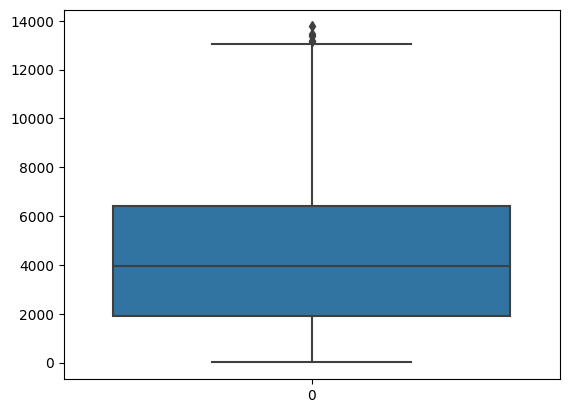

In [113]:
sns.boxplot(df_train['loan'])

### 4.2 - Cleaning

In [117]:
def cleaning(data):
    data = data.dropna()
    data = data[data['age'] > 0]
    data = data.drop('i#clientid', axis=1)
    return data



In [118]:
df_train = cleaning(df_train)
df_test = cleaning(df_test)

## 5.0 - Undersampling and Oversamplig

In [129]:
def undersampling(data):
    x_under = data.drop(['c#default'], axis=1).values
    y_under = data['c#default'].values

    tl = TomekLinks(sampling_strategy='majority')
    x_under, y_under = tl.fit_resample(x_under, y_under)

    return x_under, y_under

In [130]:
def oversampling(data):

    x_over = data.drop('c#default', axis=1).values
    y_over = data['c#default'].values

    smote = SMOTE(sampling_strategy='majority')
    x_over, y_over = smote.fit_resample(x_over, y_over)

    return x_over, y_over

## 6.0 - Modeling

### 6.1 - Train test split

In [131]:
X, y = undersampling(df_train)

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

### 6.2 - Processing data

### 6.3 - Random forest

In [135]:
rf = RandomForestClassifier(n_estimators=150, random_state=1)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

<AxesSubplot: >

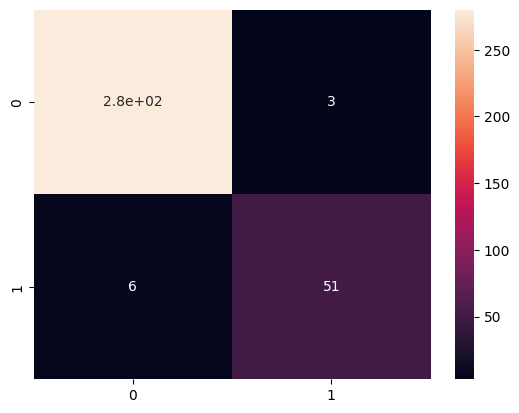

In [150]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [147]:
recall_score(y_test, y_pred)

0.8947368421052632

In [148]:
precision_score(y_test, y_pred)

0.9444444444444444